# Setup and training of synthesis models
To use this notebook, please replace "global_path" with your path to this repo. Powerful GPUs (1-2 V100s) 24-72 hours of training required, but CPU can be used if more time available.

This notebook does the following:
1. Trains the 50 phrase model.
2. Performs inference on neural data real-time block from each sentence set using real-time models.
3. Allows for performing inference using model trained from step 1.
4. Displays example waveforms (chance, personalized, ground-truth, decoded).
5. Generates the figures from steps 2-4.
6. Generate perceptual accuracy figures from the Amazon Mechanical Turk perceptual study.

In [6]:
%load_ext autoreload
%autoreload 2

In [3]:
import tqdm
import os
import sys
import librosa
import neural_synthesis as ns
from neural_synthesis.models import GSLM

# set global path to this repo
global_path = "/userdata/kaylo/repos/nature_submission_code/"

# set path to fairseq installation
# This requires https://github.com/facebookresearch/fairseq on your machine from source
YOUR_FAIRSEQ_PATH = "/userdata/kaylo/repos/fairseq/"



base_path = os.path.join(global_path, "data/pub_models/GSLM/")
hubert_checkpoint_path = "hubert_base_ls960.pt"
glow_model_path = "waveglow_256channels_new.pt"
glow_directory = os.path.join(YOUR_FAIRSEQ_PATH, "examples/textless_nlp/gslm/unit2speech")
kmeans_model_path = "km_100.bin"
tts_model_path = "tts_checkpoint_best_100.pt"
code_dict_path = "code_dict_100"
gslm_device='cuda:1'
gslm = GSLM(YOUR_FAIRSEQ_PATH, base_path, hubert_checkpoint_path,kmeans_model_path,tts_model_path,glow_model_path,glow_directory,code_dict_path,device=gslm_device)

2023-02-10 11:48:23 | INFO | fairseq.tasks.hubert_pretraining | current directory is /userdata/kaylo/repos/nature_submission_code
2023-02-10 11:48:23 | INFO | fairseq.tasks.hubert_pretraining | HubertPretrainingTask Config {'_name': 'hubert_pretraining', 'data': '/checkpoint/wnhsu/data/librispeech/960h/iter/250K_50hz_km100_mp0_65_v2', 'fine_tuning': False, 'labels': ['layer6.km500'], 'label_dir': None, 'label_rate': 50.0, 'sample_rate': 16000, 'normalize': False, 'enable_padding': False, 'max_keep_size': None, 'max_sample_size': 250000, 'min_sample_size': 32000, 'single_target': False, 'random_crop': True, 'pad_audio': False}
2023-02-10 11:48:23 | INFO | fairseq.models.hubert.hubert | HubertModel Config: {'_name': 'hubert', 'label_rate': 50.0, 'extractor_mode': default, 'encoder_layers': 12, 'encoder_embed_dim': 768, 'encoder_ffn_embed_dim': 3072, 'encoder_attention_heads': 12, 'activation_fn': gelu, 'layer_type': transformer, 'dropout': 0.1, 'attention_dropout': 0.1, 'activation_dropo

Tacotron sampling rate:  22050


In [6]:
# model arguments
path_to_train_script = os.path.join(global_path, "neural_synthesis/bin/train_supervised.py")
model_type = 'CnnRnnClassifier'    # model class
run_name = 'example_train'         # wandb param
experiment_name = 'example_train'  # wandb param
config ='example_config.yaml'      # model config
train_filename = 'train_list.txt'  # training file list
test_filename = 'test_list.txt'    # test file list
training_data_directory = os.path.join(global_path, "data/pub_data/training/")
train_data_fraction = "1.0"        # fraction of training data to use

os.system('python "{}" --model_type="{}" --run_name="{}" --experiment_name="{}" --config="{}" --train_filename="{}" \
--test_filename="{}" --debug=False --root_dir="{}" --train_data_fraction="{}"\
'.format(path_to_train_script, model_type, run_name, experiment_name, config, train_filename, test_filename, training_data_directory, train_data_fraction))

HELLO WORLD
['hgr_fixed3_gen_all_1024']
train_list.txt
test_list.txt
bravo3
data loader num elecs:  253
Number of trials used:  950
Number of windows used:  950
Number of windows per sample:  1
Data types used:  ('hub_gen_audio_scaled_1024_nostartpad', 'hgr_fixed3_gen_all_1024')


Number of trials used:  100
Number of windows used:  100
Number of windows per sample:  1
Data types used:  ('hub_gen_audio_scaled_1024_nostartpad', 'hgr_fixed3_gen_all_1024')


Created model.
Training model.


 27%|██▋       | 4/15 [00:11<00:29,  2.71s/it]

Input shape:  torch.Size([64, 1024, 506])
STEP:  1  COMPLETE
Input shape:  torch.Size([64, 1024, 506])
STEP:  2  COMPLETE
Input shape:  torch.Size([64, 1024, 506])
STEP:  3  COMPLETE
Input shape:  torch.Size([64, 1024, 506])
STEP:  4  COMPLETE
Input shape:  torch.Size([64, 1024, 506])
STEP:  5  COMPLETE



 60%|██████    | 9/15 [00:33<00:20,  3.43s/it]

Input shape:  torch.Size([64, 1024, 506])
STEP:  6  COMPLETE
Input shape:  torch.Size([64, 1024, 506])
STEP:  7  COMPLETE
Input shape:  torch.Size([64, 1024, 506])
STEP:  8  COMPLETE
Input shape:  torch.Size([64, 1024, 506])
STEP:  9  COMPLETE
Input shape:  torch.Size([64, 1024, 506])
STEP:  10  COMPLETE



 93%|█████████▎| 14/15 [00:56<00:03,  3.67s/it]

Input shape:  torch.Size([64, 1024, 506])
STEP:  11  COMPLETE
Input shape:  torch.Size([64, 1024, 506])
STEP:  12  COMPLETE
Input shape:  torch.Size([64, 1024, 506])
STEP:  13  COMPLETE
Input shape:  torch.Size([64, 1024, 506])
STEP:  14  COMPLETE
Input shape:  torch.Size([54, 1024, 506])
STEP:  15  COMPLETE



  0%|          | 0/15 [00:04<?, ?it/s]


Input shape:  torch.Size([64, 1024, 506])


Traceback (most recent call last):aded (0.000 MB deduped)
  File "/userdata/kaylo/repos/nature_submission_code/neural_synthesis/bin/train_supervised.py", line 320, in <module>
    train_model(config, device, train_dataloader, test_dataloader)
  File "/userdata/kaylo/repos/nature_submission_code/neural_synthesis/bin/train_supervised.py", line 119, in train_model
    loss.backward()
  File "/userdata/kaylo/anaconda3/envs/nature_sub/lib/python3.8/site-packages/torch/_tensor.py", line 307, in backward
    torch.autograd.backward(self, gradient, retain_graph, create_graph, inputs=inputs)
  File "/userdata/kaylo/anaconda3/envs/nature_sub/lib/python3.8/site-packages/torch/autograd/__init__.py", line 154, in backward
    Variable._execution_engine.run_backward(
KeyboardInterrupt


2

# Load models, neural data, and perform inference

This section of the code loads the neural data and models trained for the publication. It computes MCD and generates an MCD plot below. Replace the model_dir and checkpoint variable for the 50_phrase paradigm with your path and checkpoint number to run inference with your trained model from above.

In [4]:
# index setup
label_dict = {'50_phrase': {'4005': '559_26', '4057': '559_2', '4101': '559_34', '4062': '559_21', '4113': '559_28', '4161': '559_8', '3669': '559_12', '4109': '559_40', '3690': '559_32', '3836': '559_41', '3830': '559_23', '4009': '559_25', '4108': '559_27', '4025': '559_10', '4098': '559_1', '3705': '559_42', '3884': '559_48', '3719': '559_0', '4087': '559_15', '3903': '559_37', '4162': '559_4', '3804': '559_31', '4173': '559_14', '4107': '559_18', '3638': '559_17', '3981': '559_22', '4111': '559_7', '3816': '559_29', '4060': '559_43', '3653': '559_6', '3895': '559_45', '4070': '559_20', '4106': '559_3', '3939': '559_33', '3686': '559_24', '3668': '559_16', '4160': '559_49', '3834': '559_35', '3994': '559_11', '3985': '559_5', '3857': '559_39', '3842': '559_19', '3889': '559_47', '3631': '559_30', '3676': '559_9', '4155': '559_13', '3883': '559_36', '3979': '559_44', '3835': '559_46', '3988': '559_38'}, '500_phrase': {'4169': '655_0', '4053': '655_1', '3777': '655_2', '4097': '655_3', '4128': '655_4', '3634': '655_5', '4005': '655_6', '4102': '655_7', '4079': '655_8', '4111': '655_9', '3843': '655_10', '3928': '655_11', '4007': '655_12', '3863': '655_13', '3877': '655_14', '4063': '655_15', '4175': '655_16', '3874': '655_17', '4144': '655_18', '3895': '655_19', '4164': '655_20', '3847': '655_21', '3673': '655_22', '3884': '655_23', '3989': '655_24', '3888': '655_25', '4015': '655_26', '3761': '655_27', '3720': '655_28', '3838': '655_29', '4076': '655_30', '3886': '655_31', '3706': '655_32', '3631': '655_33', '3794': '655_34', '4150': '655_35', '3985': '655_36', '3929': '655_37', '3831': '655_38', '4064': '655_39', '3836': '655_40', '3896': '655_41', '4136': '655_42', '4124': '655_43', '3810': '655_44', '3639': '655_45', '4093': '655_46', '3898': '655_47', '3829': '655_48', '3871': '655_49', '3627': '656_0', '3790': '656_1', '4085': '656_2', '4009': '656_3', '3652': '656_4', '4087': '656_5', '3616': '656_6', '3687': '656_7', '3725': '656_8', '3699': '656_9', '3696': '656_10', '3885': '656_11', '4071': '656_12', '4159': '656_13', '3901': '656_14', '3778': '656_15', '3997': '656_16', '3713': '656_17', '3881': '656_18', '3859': '656_19', '3727': '656_20', '3806': '656_21', '3647': '656_22', '4129': '656_23', '3826': '656_24', '3805': '656_25', '3967': '656_26', '3972': '656_27', '3904': '656_28', '4137': '656_29', '3973': '656_30', '3758': '656_31', '3783': '656_32', '3987': '656_33', '4167': '656_34', '3788': '656_35', '3661': '656_36', '3830': '656_37', '3808': '656_38', '4018': '656_39', '4013': '656_40', '3998': '656_41', '3764': '656_42', '3701': '656_43', '3954': '656_44', '4156': '656_45', '4055': '656_46', '3812': '656_47', '3995': '656_48', '4132': '656_49', '3964': '657_0', '3738': '657_1', '3807': '657_2', '3722': '657_3', '3643': '657_4', '3992': '657_5', '3946': '657_6', '4106': '657_7', '4001': '657_8', '4176': '657_9', '3710': '657_10', '4135': '657_11', '3755': '657_12', '3702': '657_13', '3721': '657_14', '4098': '657_15', '4037': '657_16', '3704': '657_17', '4034': '657_18', '3767': '657_19', '4114': '657_20', '3900': '657_21', '4052': '657_22', '3837': '657_23', '4043': '657_24', '3857': '657_25', '3624': '657_26', '3625': '657_27', '4160': '657_28', '4173': '657_29', '3932': '657_30', '3914': '657_31', '3864': '657_32', '3623': '657_33', '4090': '657_34', '3656': '657_35', '4059': '657_36', '3835': '657_37', '3737': '657_38', '4154': '657_39', '4042': '657_40', '3957': '657_41', '3876': '657_42', '3617': '657_43', '3906': '657_44', '3894': '657_45', '4002': '657_46', '3899': '657_47', '3802': '657_48', '3828': '657_49'}, 'tm1k': {'12594': '784_0', '13224': '784_1', '12691': '784_2', '12241': '784_3', '12741': '784_4', '11901': '784_5', '11816': '784_6', '12988': '784_7', '12937': '784_8', '12614': '784_9', '13280': '784_10', '12556': '784_11', '13046': '784_12', '12344': '784_13', '12322': '784_14', '13447': '784_15', '11297': '784_16', '12648': '784_17', '12183': '784_18', '12198': '784_19', '12695': '784_20', '11713': '784_21', '12128': '784_22', '13035': '784_23', '11744': '784_24', '12952': '784_25', '13169': '784_26', '13265': '784_27', '12119': '784_28', '11774': '784_29', '12255': '784_30', '12712': '784_31', '13402': '784_32', '12207': '784_33', '12031': '784_34', '13171': '784_35', '12872': '784_36', '12303': '784_37', '13010': '784_38', '13419': '784_39', '12581': '784_40', '12912': '784_41', '12388': '784_42', '12956': '784_43', '12217': '784_44', '12265': '784_45', '12190': '784_46', '11447': '784_47', '13413': '784_48', '13404': '784_49', '12527': '785_0', '12823': '785_1', '12890': '785_2', '12855': '785_3', '12404': '785_4', '12794': '785_5', '12177': '785_6', '12592': '785_7', '12336': '785_8', '12907': '785_9', '13055': '785_10', '12305': '785_11', '13027': '785_12', '12675': '785_13', '11509': '785_14', '11708': '785_15', '12787': '785_16', '11950': '785_17', '13131': '785_18', '13124': '785_19', '12206': '785_20', '12047': '785_21', '13434': '785_22', '13368': '785_23', '12398': '785_24', '13024': '785_25', '12434': '785_26', '12113': '785_27', '11908': '785_28', '13041': '785_29', '11737': '785_30', '11985': '785_31', '12490': '785_32', '13026': '785_33', '13190': '785_34', '12967': '785_35', '13324': '785_36', '12321': '785_37', '12804': '785_38', '12895': '785_39', '12698': '785_40', '11813': '785_41', '13390': '785_42', '11975': '785_43', '11564': '785_44', '11904': '785_45', '11989': '785_46', '11636': '785_47', '11822': '785_48', '13129': '785_49', '12343': '788_0', '13257': '788_1', '11699': '788_2', '12191': '788_3', '13218': '788_4', '12763': '788_5', '13305': '788_6', '12373': '788_7', '13073': '788_8', '12607': '788_9', '11345': '788_10', '11689': '788_11', '12365': '788_12', '11584': '788_13', '12075': '788_14', '13040': '788_15', '12144': '788_16', '11826': '788_17', '12601': '788_18', '11790': '788_19', '12402': '788_20', '12149': '788_21', '13113': '788_22', '11391': '788_23', '11838': '788_24', '13142': '788_25', '12531': '788_26', '12759': '788_27', '12014': '788_28', '12425': '788_29', '12564': '788_30', '12164': '788_31', '12418': '788_32', '12628': '788_33', '12286': '788_34', '11677': '788_35', '11881': '788_36', '12803': '788_37', '13278': '788_38', '13215': '788_39', '12459': '788_40', '11412': '788_41', '12979': '788_42', '13139': '788_43', '11912': '788_44', '12578': '788_45', '12916': '788_46', '12276': '788_47', '12824': '788_48', '11200': '788_49', '11536': '789_0', '12818': '789_1', '12151': '789_2', '12037': '789_3', '13426': '789_4', '12685': '789_5', '12662': '789_6', '13274': '789_7', '13157': '789_8', '13421': '789_9', '12781': '789_10', '12725': '789_11', '12779': '789_12', '11561': '789_13', '12975': '789_14', '12704': '789_15', '12274': '789_16', '13270': '789_17', '12240': '789_18', '11604': '789_19', '12435': '789_20', '11918': '789_21', '13378': '789_22', '12438': '789_23', '12958': '789_24', '11970': '789_25', '12297': '789_26', '13213': '789_27', '11939': '789_28', '12569': '789_29', '13264': '789_30', '11614': '789_31', '13179': '789_32', '13334': '789_33', '13021': '789_34', '12485': '789_35', '13090': '789_36', '13154': '789_37', '12573': '789_38', '13030': '789_39', '11617': '789_40', '12482': '789_41', '13146': '789_42', '13462': '789_43', '11173': '789_44', '12277': '789_45', '12138': '789_46', '11930': '789_47', '12750': '789_48', '12858': '789_49'}}
inv_label_dict = {}
for paradigm in label_dict.keys():
    inv_label_dict[paradigm] = {v: k for k, v in label_dict[paradigm].items()}

In [46]:
import numpy as np
import torch
import torchaudio.functional as FA
import warnings
warnings.filterwarnings("ignore")

# paradigm, model, and evaluation set parameters
# single block evaluation for speed and simplicity
data_dict = {
    "50_phrase": {
        "blocks": [559], 
        "model_dir": os.path.join(global_path, "data/pub_models/10-kl_rw_50_phrase_avatar"),
        "checkpoint": 410000
    },
    "500_phrase": {
        "blocks": [657],
        "model_dir": os.path.join(global_path, "data/pub_models/22-rw_kl_500_phrase_avatar"),
        "checkpoint": 300000
    },
    "tm1k": {
        "blocks": [789],
        "model_dir": os.path.join(global_path, "data/pub_models/30-rw_kl_tm1k_synthesis_avatar"),
        "checkpoint": 180000
    }
}

# initialize CTC decoder
ctc_decoder = ns.ctc_utils.Decoder(blank_index=100, silent=[None], remove_rep=True)
                                  
# initialize base parameters
base_dir = os.path.join(global_path, "data/pub_data/b3_pub_data/")
b3_voice_dir = os.path.join(global_path, "data/pub_data/b3_voice/")             
aud_sr = 16000
gt_sr = 22050           # This is because GSLM outputs 22050 kHz audio, whereas we stream 16kHz audio
neural_sr = 200
save_chance_data = False # Whether to regenerate the chance audio
n_trials_per_block = 50

# append metrics and data to data_dict shared data dictionary
def append_entry(key, value):
    if key not in p_dict:
        p_dict[key] = []
    p_dict[key].append(value)
                                  
def generate_speech(neural_data, model, chance=False):                         
    if chance:
        inputs = torch.unsqueeze(torch.Tensor(neural_data)[:, torch.randperm(torch.Tensor(neural_data).size()[1])], 0) 
    else:
        inputs = torch.unsqueeze(torch.Tensor(neural_data), 0)
    t_preds = model(inputs) 
    estimated_sequences = torch.squeeze(torch.argmax(t_preds, dim=-1))
    seq = torch.Tensor(ctc_decoder.process_list(estimated_sequences.detach().cpu().numpy().tolist()))
    mel, audio = gslm.decode(torch.unsqueeze(torch.squeeze(seq),0).to(torch.int64), return_wave = True)
    mel = np.squeeze(mel[0].cpu().numpy())
    audio = np.squeeze(audio[0].cpu().numpy())  
    audio = FA.resample(torch.Tensor(audio), gt_sr, aud_sr).cpu().numpy().astype(np.float32)
    return seq, audio, mel
        
for paradigm, p_dict in data_dict.items():
       
    # load the model which predicts discrete speech units from brain data
    neural_model, neural_config = ns.decoding.load_model_ecog2x_to_gimdecode(p_dict['model_dir'], 'ecog2phrase', 
                                                                             p_dict['checkpoint'], device='cpu', return_config=True)
    
    # define directories with stored metrics and data
    blocks = p_dict['blocks'] 
    if 'tm1k' in paradigm:
        wav_dir = os.path.join(base_dir, 'hwv_gen_audio_scaled_tm1k_1024_nostartpad')
    else:
        wav_dir = os.path.join(base_dir, 'hwv_gen_audio_scaled_1024_nostartpad')
    c_audio_dir = os.path.join(base_dir, 'chance_audio')
    c_mcd_dir = os.path.join(base_dir, 'chance_mcd')
    mcd_dir = os.path.join(base_dir, 'mcd')
    neural_dir = os.path.join(base_dir, 'neural_data')
    
    # process block
    for block in tqdm.tqdm(blocks):
        print("Processing block ", block)

        # for each trial in the block
        for trial_num in range(n_trials_per_block):

            # load neural data
            rt_neural_data = np.squeeze(np.load(os.path.join(neural_dir, str(block)+'_'+str(trial_num)+'.hgr.npy')))
            event_label = inv_label_dict[paradigm][str(block)+'_'+str(trial_num)]
            append_entry('trial_num', trial_num)
            append_entry('block_num', block)
            
            # get chance units and audio 
            if save_chance_data:
                c_processed_seq, c_audio, _ = generate_speech(rt_neural_data, neural_model, chance=True)
                np.save(os.path.join(c_audio_dir, str(block)+'_'+str(trial_num)+'.wav.npy'), c_audio)
            else:
                # load the generated chance arrays
                c_audio = np.load(os.path.join(c_audio_dir, str(block)+'_'+str(trial_num)+'.wav.npy'))        

            # synthesize speech and get mcd
            gt_audio_raw = np.squeeze(np.load(os.path.join(wav_dir, str(event_label)+'.wav.npy')))
            gt_audio = FA.resample(torch.Tensor(gt_audio_raw), gt_sr, aud_sr).cpu().numpy().astype(np.float32)
            pred_units, pred_audio, _ = generate_speech(rt_neural_data, neural_model, chance=False)
            mcd = ns.utils.compute_mcd(gt_audio, pred_audio)
            c_mcd = ns.utils.compute_mcd(gt_audio, c_audio)
            append_entry('mcd', mcd)
            append_entry('c_mcd', c_mcd)
            append_entry('gt_audio', gt_audio)
            append_entry('pred_audio', pred_audio)
            append_entry('c_audio', c_audio)

            # load the participant's personalized voice 
            gt_output_wav = os.path.join(b3_voice_dir, 'gt', str(block)+'_'+str(trial_num)+'.wav')
            pred_output_wav = os.path.join(b3_voice_dir, 'preds', str(block)+'_'+str(trial_num)+'.wav')
            b3_audio_gt, sr = librosa.load(gt_output_wav)
            b3_audio_gt = librosa.resample(b3_audio_gt, sr, aud_sr)
            b3_audio_pred, sr = librosa.load(pred_output_wav)
            b3_audio_pred = librosa.resample(b3_audio_pred, sr, aud_sr) 
            b3_mcd = ns.utils.compute_mcd(b3_audio_gt, b3_audio_pred)
            append_entry('gt_audio_b3', b3_audio_gt)
            append_entry('pred_audio_b3', b3_audio_pred)
            append_entry('b3_mcd', b3_mcd)

  0%|                                | 0/1 [00:00<?, ?it/s]

Processing block  559


  0%|                                | 0/1 [00:00<?, ?it/s]

Processing block  657


  0%|                                | 0/1 [00:00<?, ?it/s]

Processing block  789


100%|████████████████████████| 1/1 [00:51<00:00, 51.17s/it]


In [47]:
from IPython.display import Audio

# Example predicted audio
trial_num = 0
Audio(data_dict['50_phrase']['pred_audio'][trial_num], rate=aud_sr, autoplay=True)

In [48]:
# Example ground truth audio
Audio(data_dict['50_phrase']['gt_audio'][trial_num], rate=aud_sr, autoplay=True)

In [49]:
# Example chance audio
Audio(data_dict['50_phrase']['c_audio'][trial_num], rate=aud_sr, autoplay=True)

In [56]:
# Example predicted personal voice audio (conversion from real-time decoded audio)
Audio(data_dict['50_phrase']['pred_audio_b3'][trial_num], rate=aud_sr, autoplay=True)

In [57]:
# Example ground-truth personal voice audio (conversion from ground-truth audio)
Audio(data_dict['50_phrase']['gt_audio_b3'][trial_num], rate=aud_sr, autoplay=True)

# Figure generation and perceptual evaluations
Generate MCD plots. Compute perceptual WER and CER from an Amazon Mechanical Turk results file

In [50]:
# get perceptual results
import csv
import contractions
import string
import torchaudio

percept_dir = os.path.join(global_path, 'data/perceptual_results/')
aud_result_file = os.path.join(percept_dir, 'b3_synth_final.csv')

for paradigm, p_dict in data_dict.items():
    data_dict[paradigm]['aud_wer'] = []
    data_dict[paradigm]['aud_cer'] = []
    
def isBlank (myString):
    if myString and myString.strip():
        return False
    return True

def argmedian(x):
    return np.argpartition(x, len(x) // 2)[len(x) // 2]

def get_metrics_from_csv(fname, entry, eval_lim=12):
    transcription_dictionary = {}
    for paradigm, p_dict in data_dict.items():
        for block in p_dict['blocks']:
            for n in range(50):
                transcription_dictionary[str(block)+'_'+str(n)+'_acc'] = []
        data_dict[paradigm]['human_transcript_' + entry + '_wer'] = []
        data_dict[paradigm]['target_human_transcript_' + entry + '_wer'] = []
        data_dict[paradigm]['human_transcript_' + entry + '_cer'] = []
        data_dict[paradigm]['target_human_transcript_' + entry + '_cer'] = []
        
    with open(fname, 'r', newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=",")
        for i, line in enumerate(reader):
            
            # get results and expand contractions
            correct_result = line[28]
            expanded_words = []   
            for word in correct_result.split():
                expanded_words.append(contractions.fix(word))  
            expanded_correct_text = ' '.join(expanded_words)
            
            human_result = line[29]
            expanded_words = []   
            for word in human_result.split():
                expanded_words.append(contractions.fix(word))  
            expanded_human_text = ' '.join(expanded_words)  
            
            # remove punctuation
            correct_result = expanded_correct_text.translate(str.maketrans('', '', string.punctuation)).lower()
            human_transcript = expanded_human_text.translate(str.maketrans('', '', string.punctuation)).lower()
            
            if isBlank(human_result):
                continue
            if i == 0:
                continue
                
            # get dictionary of per sentence WER, CER metrics
            block = int(line[27].split('/')[-1].split('_')[1])
            trial = int(line[27].split('/')[-1].split('_')[2].split('.')[0])
            wer = torchaudio.functional.edit_distance(correct_result.split(' '), human_transcript.split(' '))/len(correct_result.split(' ')) 
            cer = torchaudio.functional.edit_distance(correct_result, human_transcript)/len(correct_result)
            if str(block)+'_'+str(trial)+'_wer' not in transcription_dictionary:
                transcription_dictionary[str(block)+'_'+str(trial)+'_wer'] = [wer]
                transcription_dictionary[str(block)+'_'+str(trial)+'_cer'] = [cer]
                transcription_dictionary[str(block)+'_'+str(trial)+'_correct_text_csv'] = [correct_result]
                transcription_dictionary[str(block)+'_'+str(trial)+'_human_text_csv'] = [human_transcript]
            else:
                transcription_dictionary[str(block)+'_'+str(trial)+'_wer'].append(wer)
                transcription_dictionary[str(block)+'_'+str(trial)+'_cer'].append(cer)
                transcription_dictionary[str(block)+'_'+str(trial)+'_correct_text_csv'].append(correct_result)
                transcription_dictionary[str(block)+'_'+str(trial)+'_human_text_csv'].append(human_transcript)
                
        # report median WER, CER
        min_evals = 100
        min_dict = {}
        for i in range(13):
            min_dict[str(i)] = 0
        transcription_dictionary = dict(sorted(transcription_dictionary.items()))
        for idx, acc_vector in transcription_dictionary.items():
            if 'wer' in idx or 'cer' in idx:
                block = int(idx.split('_')[0])
                trial = int(idx.split('_')[1])
                correct_transcripts = transcription_dictionary[str(block)+'_'+str(trial)+'_correct_text_csv']
                human_transcripts = transcription_dictionary[str(block)+'_'+str(trial)+'_human_text_csv']
                n_evals = len(acc_vector)
                if n_evals < min_evals:
                    min_evals = n_evals
                if n_evals > eval_lim:
                    acc_vector = acc_vector[:eval_lim]
                min_dict[str(n_evals)] += 1
                median_metric = np.median(acc_vector)
                median_transcript = human_transcripts[argmedian(acc_vector)]
                median_targ_transcript = correct_transcripts[argmedian(acc_vector)]
                for paradigm, p_dict in data_dict.items():
                    if block in p_dict['blocks']:
                        if 'wer' in idx:
                            data_dict[paradigm][entry + '_wer'].append(median_metric)
                            data_dict[paradigm]['human_transcript_'+ entry + '_wer'].append(median_transcript)
                            data_dict[paradigm]['target_human_transcript_'+ entry + '_wer'].append(median_targ_transcript)
                        elif 'cer' in idx:
                            data_dict[paradigm][entry + '_cer'].append(median_metric) 
                            data_dict[paradigm]['human_transcript_'+ entry + '_cer'].append(median_transcript)
                            data_dict[paradigm]['target_human_transcript_'+ entry + '_cer'].append(median_targ_transcript)
                            
get_metrics_from_csv(aud_result_file, 'aud', eval_lim=12) 

In [51]:
import scipy.stats as st
import random

# compute boostrapped metrics
def parcel_acc(acc_seq, parcel_len=10, median=False):
    n_parcels = np.ceil(len(acc_seq)/ parcel_len).astype(np.int32)
    acc_dist = []
    for pidx in range(n_parcels):
        if median == False:
            acc_dist.append(np.mean(acc_seq[pidx*parcel_len:(pidx+1)*parcel_len]))
    return acc_dist

metrics = ['b3_mcd', 'aud_wer', 'aud_cer', 'mcd', 'c_mcd']
alpha = 0.99
num_bootstraps = 2000
box_metrics = {}
print("Example pseudoblock median accuracies and 99% confidence intervals")
for paradigm, p_dict in data_dict.items():
    print("\nParadigm: ", paradigm)
    for i, metric in enumerate(metrics):
        metric_dist_name = metric + '_dist'
        parceled_data = parcel_acc(p_dict[metric], median=False)
        bootstrapped_data = ns.analysis.get_bootstrapped_accuracies(parceled_data, median=True, num_repeats=num_bootstraps)
        p_dict[metric_dist_name] = parceled_data
        confidence_interval = (np.percentile(bootstrapped_data,0.5).round(decimals=5), np.percentile(bootstrapped_data,99.5).round(decimals=5))
        print(metric_dist_name, np.median(p_dict[metric_dist_name]).round(decimals=5), confidence_interval)
        if metric_dist_name not in box_metrics:
            box_metrics[metric_dist_name] = []
            box_metrics[metric] = []
        box_metrics[metric_dist_name].append(p_dict[metric_dist_name])
        box_metrics[metric].append(p_dict[metric])

Example pseudoblock median accuracies and 99% confidence intervals

Paradigm:  50_phrase
b3_mcd_dist 3.87821 (3.82196, 4.45854)
aud_wer_dist 0.08556 (0.045, 0.16)
aud_cer_dist 0.0842 (0.01944, 0.11818)
mcd_dist 3.62035 (3.185, 3.81963)
c_mcd_dist 7.25 (6.75523, 8.77969)

Paradigm:  500_phrase
b3_mcd_dist 5.11076 (4.55393, 5.4386)
aud_wer_dist 0.29333 (0.14833, 0.39333)
aud_cer_dist 0.24484 (0.13023, 0.35636)
mcd_dist 4.82807 (4.35158, 5.67472)
c_mcd_dist 9.04056 (8.53954, 9.14753)

Paradigm:  tm1k
b3_mcd_dist 5.76222 (5.22206, 6.63647)
aud_wer_dist 0.64143 (0.44548, 0.80917)
aud_cer_dist 0.49263 (0.34798, 0.63005)
mcd_dist 5.40168 (5.19642, 6.32282)
c_mcd_dist 8.56566 (8.28316, 9.81799)


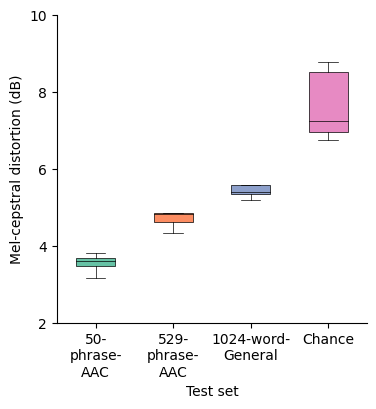

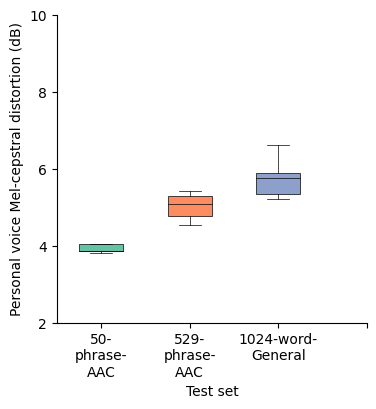

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

lw = 0.5
sf = False
flierprops = dict(markersize=2)
box_width = 0.5
colors = sns.color_palette("Set2", 5)
axs = {}
cond_d = box_metrics['mcd_dist']
cond_d_c = box_metrics['c_mcd_dist']
data_list = cond_d + [cond_d_c[0]]
mcd_box_label = ['50-\nphrase-\nAAC', "529-\nphrase-\nAAC", "1024-word-\nGeneral", "Chance"]
fig, axs['mcd'] = plt.subplots(figsize=(4, 4))
bx = axs['mcd'].boxplot(data_list, labels=mcd_box_label, widths=box_width, patch_artist=True, boxprops=dict(linewidth=lw), medianprops=dict(linewidth=lw, color='black')
, whiskerprops= dict(linewidth=lw, color='black'), capprops={"linewidth": lw}, showfliers=sf, flierprops=flierprops)
for i, patch in enumerate(bx['boxes']):
    patch.set(facecolor=colors[i])
axs['mcd'].set_ylim(2,10)
axs['mcd'].set_yticks(np.arange(2, 12, 2))
axs['mcd'].set_xlim([0.5, len(data_list)+0.5])
axs['mcd'].set_xlabel('Test set')
axs['mcd'].set_ylabel('Mel-cepstral distortion (dB)')
axs['mcd'].spines.right.set_visible(False)
axs['mcd'].spines.top.set_visible(False)
axs['mcd'].set_xticks([1, 2, 3, 4])

cond_d = box_metrics['b3_mcd_dist']
data_list = cond_d
mcd_box_label = ['50-\nphrase-\nAAC', "529-\nphrase-\nAAC", "1024-word-\nGeneral"]
fig, axs['b3_mcd'] = plt.subplots(figsize=(4, 4))
bx = axs['b3_mcd'].boxplot(data_list, labels=mcd_box_label, widths=box_width, patch_artist=True, boxprops=dict(linewidth=lw), medianprops=dict(linewidth=lw, color='black')
, whiskerprops= dict(linewidth=lw, color='black'), capprops={"linewidth": lw}, showfliers=sf, flierprops=flierprops)
for i, patch in enumerate(bx['boxes']):
    patch.set(facecolor=colors[i])
axs['b3_mcd'].set_ylim(2,10)
axs['b3_mcd'].set_yticks(np.arange(2, 12, 2))
axs['b3_mcd'].set_xlim([0.5, len(data_list)+0.5])
axs['b3_mcd'].set_xlabel('Test set')
axs['b3_mcd'].set_ylabel('Personal voice Mel-cepstral distortion (dB)')
axs['b3_mcd'].spines.right.set_visible(False)
axs['b3_mcd'].spines.top.set_visible(False)
axs['b3_mcd'].set_xticks([1, 2, 3, 4])

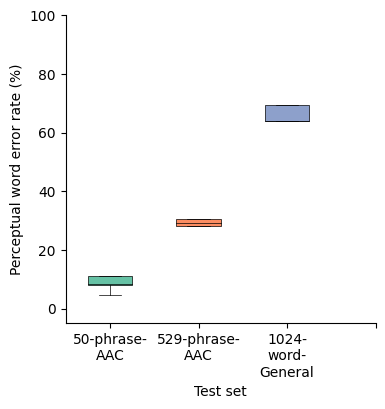

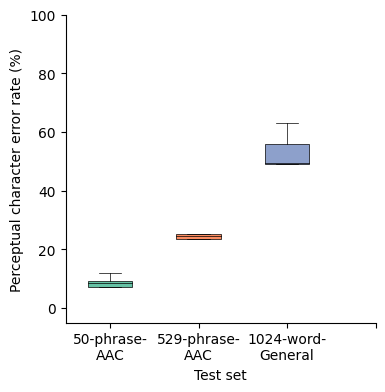

In [53]:
y_lower = -5
box_label = ['50-phrase-\nAAC', "529-phrase-\nAAC", "1024-\nword-\nGeneral"]
cond_d = [(np.clip(np.array(i), 0, 1.0)) * 100 for i in box_metrics['aud_wer_dist']]
data_list = cond_d
fig, axs['wer'] = plt.subplots(figsize=(4, 4))
bx = axs['wer'].boxplot(data_list, labels=box_label, widths=box_width, patch_artist=True, boxprops= dict(linewidth=lw), medianprops=dict(linewidth=lw, color='black')
, whiskerprops= dict(linewidth=lw, color='black'), capprops={"linewidth": lw}, showfliers=sf, flierprops=flierprops)
for i, patch in enumerate(bx['boxes']):
    patch.set(facecolor=colors[i])
y_upper = 100
axs['wer'].set_ylim(y_lower,y_upper)
axs['wer'].set_yticks(np.arange(0, y_upper+20, 20))
axs['wer'].set_xlabel('Test set')
axs['wer'].set_ylabel('Perceptual word error rate (%)')
axs['wer'].spines.right.set_visible(False)
axs['wer'].spines.top.set_visible(False)
axs['wer'].set_xticks([1, 2, 3, 4])

box_label = ['50-phrase-\nAAC', "529-phrase-\nAAC", "1024-word-\nGeneral"]
cond_d = [(np.clip(np.array(i), 0, 1.0)) * 100 for i in box_metrics['aud_cer_dist']]
data_list = cond_d
fig, axs['cer'] = plt.subplots(figsize=(4, 4))
bx = axs['cer'].boxplot(data_list, labels=box_label, widths=box_width, patch_artist=True, boxprops= dict(linewidth=lw), medianprops=dict(linewidth=lw, color='black')
, whiskerprops= dict(linewidth=lw, color='black'), capprops={"linewidth": lw}, showfliers=sf, flierprops=flierprops)
for i, patch in enumerate(bx['boxes']):
    patch.set(facecolor=colors[i])
y_upper = 100
axs['cer'].set_ylim(y_lower,y_upper)
axs['cer'].set_yticks(np.arange(0, y_upper+20, 20))
axs['cer'].set_xlabel('Test set')
axs['cer'].set_ylabel('Perceptual character error rate (%)')
axs['cer'].spines.right.set_visible(False)
axs['cer'].spines.top.set_visible(False)
axs['cer'].set_xticks([1, 2, 3, 4])